## Πανεπιστήμιο Δυτικής Αττικής
## Τμήμα Βιομηχανικής Σχεδίασης και Παραγωγής

### NIKO GARRO
<br>
<br>

# Ταξινόμηση με:

- # κ Γείτονες
- # Random Forest

## στα Δεδομένα Pima Indians Diabetes Database

8 χαρακτηριστικά και μια μεταβλητή κατηγορίας-στόχος
<br>
- **Pregnancies:** Number of times pregnant
- **Glucose:** Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure:** Diastolic blood pressure (mm Hg)
- **SkinThickness:**Triceps skin fold thickness (mm)
- **Insulin:**2-Hour serum insulin (mu U/ml)
- **BMI:**Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction:**Diabetes pedigree function
- **Age:**Age (years)

- **Outcome:**Class variable (0 or 1) 268 of 768 are 1, the others are 0

<br>
<br>

### **Προετοιμασία με εισαγωγή απαραίτητων βιβλιοθηκών**

In [1]:
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report


%matplotlib inline

<br>

## Εισαγωγή και μελέτη δεδομένων 

Η Pandas έχει εντολές για εισαγωγή δεδομένων σε διάφορες μορφές όπως csv, excel,sql,json κλπ

#### Εισαγωγή αρχείου δεδομένων τύπου csv

In [3]:
data=pd.read_csv('data/diabetes.csv')

### Πληροφορίες δεδομένων

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Καταμέτρηση μοναδικών τιμών για συγκεκριμένο χαρακτηριστικό

In [5]:
data['Label'].value_counts()

0    500
1    268
Name: Label, dtype: int64

<br>
<br>
<br>

# Διαχωρισμός σε δεδομένα εκπαίδευσης και δεδομένα ελέγχου

In [6]:
X = data[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']]
y= data['Label']

Χρησιμοποιούμε το εργαλείο της βιβλιοθήκης Scikit-learn ``train_test_split`` για να μοιράσουμε τα δεδομένα σε εκπαίδευσης και δεδομένα ελέγχου 

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=17)

# Εκπαίδευση μοντέλου Κ-ΝΝ  

### 1. Εισαγωγή βιβλιοθήκης οικογένειας αλγορίθμων

In [8]:
from sklearn.neighbors import KNeighborsClassifier

### 2. Ορισμός μοντέλου και επιλογή συγκεκριμένου αλγόριθμου μάθησης 

In [9]:
knnClass = KNeighborsClassifier(n_neighbors=7)

### 3. Εκπαίδευση μοντέλου

In [10]:
knnClass.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

### 4. Αξιολόγηση μοντέλου με είσοδο τα δεδομένα ελέγχου


In [11]:
y_pred = knnClass.predict(X_test)

In [12]:
type(y_pred)

numpy.ndarray

Έξοδος εκπαιδευμένου μοντέλου με είσοδο τα δεδομένα ελέγχου (test)

In [13]:
confusion_matrix(y_test, y_pred)

array([[125,  25],
       [ 36,  45]], dtype=int64)

In [14]:
f1_score(y_test, y_pred)

0.5960264900662252

In [15]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support



           0       0.78      0.83      0.80       150

           1       0.64      0.56      0.60        81



    accuracy                           0.74       231

   macro avg       0.71      0.69      0.70       231

weighted avg       0.73      0.74      0.73       231




# Εκπαίδευση Δέντρου Απόφασης  

### 1. Εισαγωγή βιβλιοθήκης οικογένειας αλγορίθμων

In [16]:
from sklearn import tree

### 2. Ορισμός μοντέλου και επιλογή συγκεκριμένου αλγόριθμου μάθησης 

In [17]:
dtree = tree.DecisionTreeClassifier("entropy")

C:\Users\NIKO\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass criterion=entropy as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error

  warnings.warn(f"Pass {args_msg} as keyword args. From version "


### 3. Εκπαίδευση μοντέλου

In [18]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

### 4. Αξιολόγηση μοντέλου με είσοδο τα δεδομένα ελέγχου


Έξοδος εκπαιδευμένου μοντέλου με είσοδο τα δεδομένα ελέγχου (test)

In [19]:
y_pred = dtree.predict(X_test)

In [20]:
type(y_pred)

numpy.ndarray

In [21]:
confusion_matrix(y_test, y_pred)

array([[121,  29],
       [ 32,  49]], dtype=int64)

In [22]:
f1_score(y_test, y_pred)

0.6163522012578617

In [23]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support



           0       0.79      0.81      0.80       150

           1       0.63      0.60      0.62        81



    accuracy                           0.74       231

   macro avg       0.71      0.71      0.71       231

weighted avg       0.73      0.74      0.73       231




# Εκπαίδευση Random Forest  

### 1. Εισαγωγή βιβλιοθήκης οικογένειας αλγορίθμων

In [24]:
from sklearn.ensemble import RandomForestClassifier

### 2. Ορισμός μοντέλου και επιλογή συγκεκριμένου αλγόριθμου μάθησης 

In [25]:
rfc = RandomForestClassifier(n_estimators=500,max_features = 3)

### 3. Εκπαίδευση μοντέλου

In [26]:
rfc.fit(X_train, y_train)

RandomForestClassifier(max_features=3, n_estimators=500)

### 4. Αξιολόγηση μοντέλου με είσοδο τα δεδομένα ελέγχου


Έξοδος εκπαιδευμένου μοντέλου με είσοδο τα δεδομένα ελέγχου (test)

In [27]:
y_pred_test = rfc.predict(X_test)
y_pred_train = rfc.predict(X_train)

In [28]:
confusion_matrix(y_test, y_pred_test)

array([[130,  20],
       [ 31,  50]], dtype=int64)

In [29]:
score_test=f1_score(y_test, y_pred_test)
score_test

0.662251655629139

In [30]:
score_train=f1_score(y_train, y_pred_train)
score_train

1.0

In [31]:
target_names = ['0', '1']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support



           0       0.79      0.81      0.80       150

           1       0.63      0.60      0.62        81



    accuracy                           0.74       231

   macro avg       0.71      0.71      0.71       231

weighted avg       0.73      0.74      0.73       231




In [32]:
rfc.feature_importances_

array([0.08189048, 0.28299482, 0.08162837, 0.06060217, 0.06664871,
       0.15658404, 0.12993184, 0.13971956])

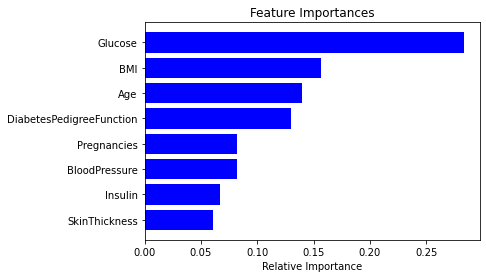

In [33]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']
importances = rfc.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()